<a href="https://colab.research.google.com/github/GbotemiB/DSN-2023-Hackathon/blob/main/2023_DSN_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#storing the data path into variables
train_path = "https://github.com/GbotemiB/DSN-2023-Hackathon/raw/main/Housing_dataset_train.csv"
test_path = "https://github.com/GbotemiB/DSN-2023-Hackathon/raw/main/Housing_dataset_test.csv"
submission_sample_path = "https://github.com/GbotemiB/DSN-2023-Hackathon/raw/main/Sample_submission.csv"

In [ ]:
#importing libraries for analysis
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [ ]:
#reading the files with pandas and storing it into variables
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission_sample = pd.read_csv(submission_sample_path)

In [ ]:
#the first 5 top row
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [ ]:
#the size of the train data and test data
train.shape, test.shape

((14000, 7), (6000, 6))

## Analysis

In [ ]:
#giving more infomation about the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [ ]:
#a simple desciptive analysis of the train data
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [ ]:
#checking for duplicates
train.duplicated().sum()

0

In [ ]:
#the count of missing data in the columns
train.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [ ]:
#checking the value counts for the ID columns. This shows that the ID column is not a unique column
train.ID.value_counts()

583      3
1438     3
1330     3
2473     3
1531     3
        ..
12986    1
10089    1
6406     1
6070     1
8787     1
Name: ID, Length: 10182, dtype: int64

In [ ]:
#showing the percentage of the missing data
(train.isna().sum() / len(train)) * 100

ID                0.000000
loc              12.950000
title            12.300000
bedroom          12.850000
bathroom         12.892857
parking_space    12.935714
price             0.000000
dtype: float64

In [ ]:
#value counts of the location column
train['loc'].value_counts(sort=True)

Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Nasarawa       349
Cross River    349
Zamfara        348
Imo            348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Plateau        338
Osun           338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: loc, dtype: int64

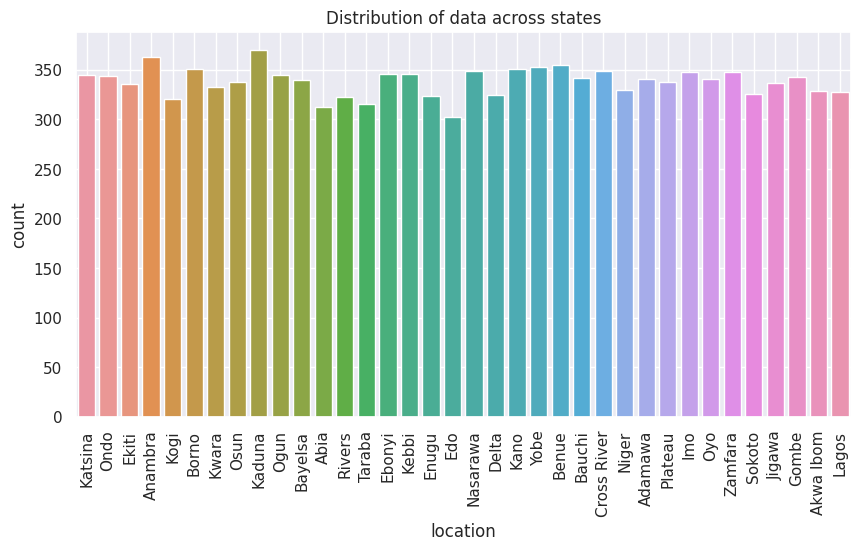

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='loc')
plt.xticks(rotation=90)
plt.xlabel('location')
plt.title('Distribution of data across states')

plt.grid(True)
plt.show()

In [ ]:
#the value count for the title column
train['title'].value_counts()

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

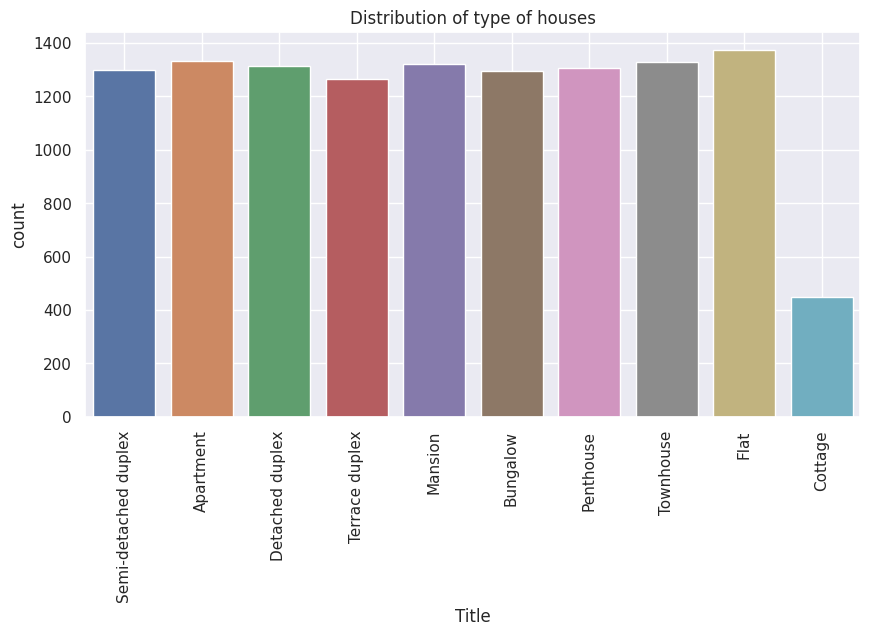

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='title')
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.title('Distribution of type of houses')

plt.grid(True)
plt.show()

In [ ]:
#the value count for the bedroom column
train['bedroom'].value_counts()

5.0    1789
2.0    1741
1.0    1738
3.0    1736
4.0    1641
6.0     908
7.0     888
9.0     883
8.0     877
Name: bedroom, dtype: int64

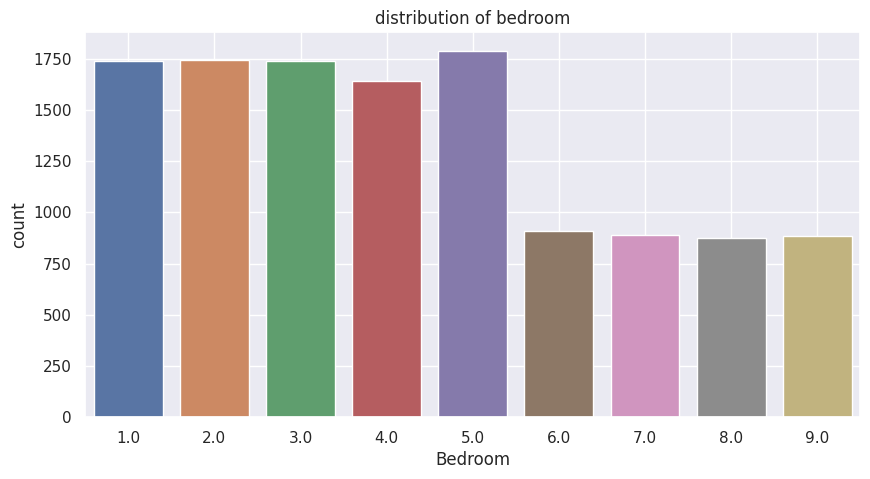

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='bedroom')
plt.xlabel('Bedroom')
plt.title('distribution of bedroom')

plt.grid(True)
plt.show()

In [ ]:
#the value count for the bathroom column
train['bathroom'].value_counts()

1.0    3272
2.0    3255
7.0    1156
5.0    1143
6.0    1138
3.0    1119
4.0    1112
Name: bathroom, dtype: int64

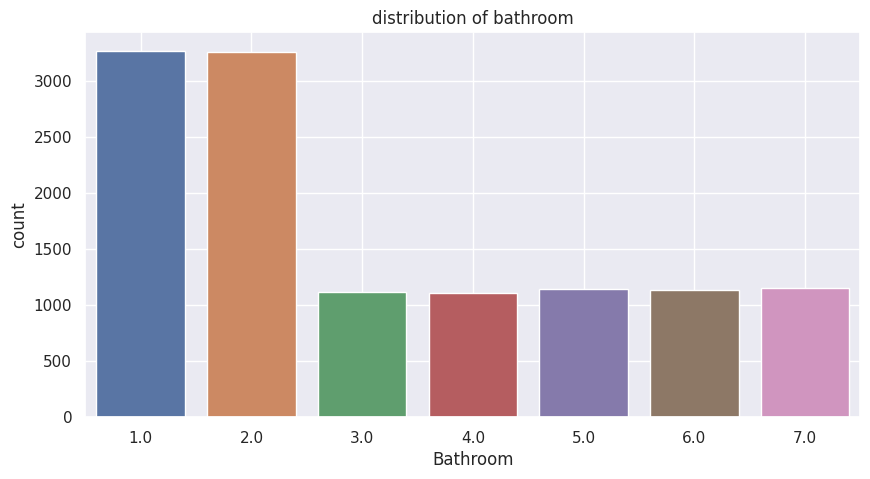

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='bathroom')
plt.xlabel('Bathroom')
plt.title('distribution of bathroom')

plt.grid(True)
plt.show()

In [ ]:
#the value count for the parking_space column
train['parking_space'].value_counts()

4.0    2419
2.0    2394
3.0    2378
1.0    2324
6.0    1345
5.0    1329
Name: parking_space, dtype: int64

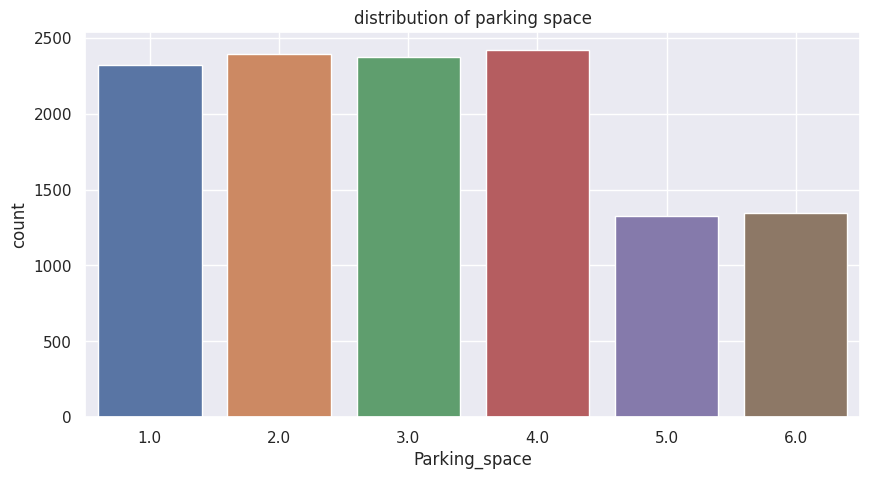

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='parking_space')
plt.xlabel('Parking_space')
plt.title('distribution of parking space')

plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

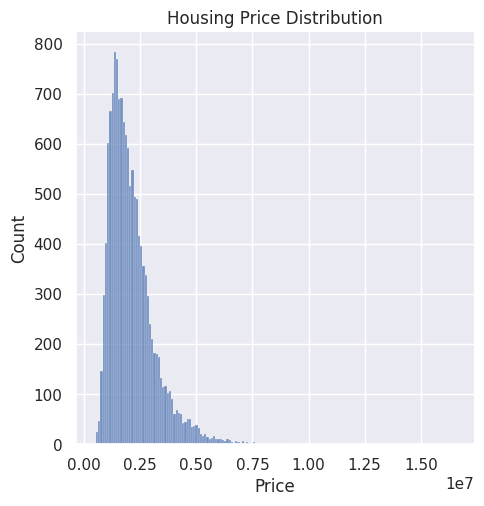

In [ ]:
#plotting the housing price distribution data
plt.figure(figsize=(10,5))
sns.displot(data=train, x='price')
plt.xlabel('Price')
plt.title('Housing Price Distribution')

plt.grid(True)
plt.show()

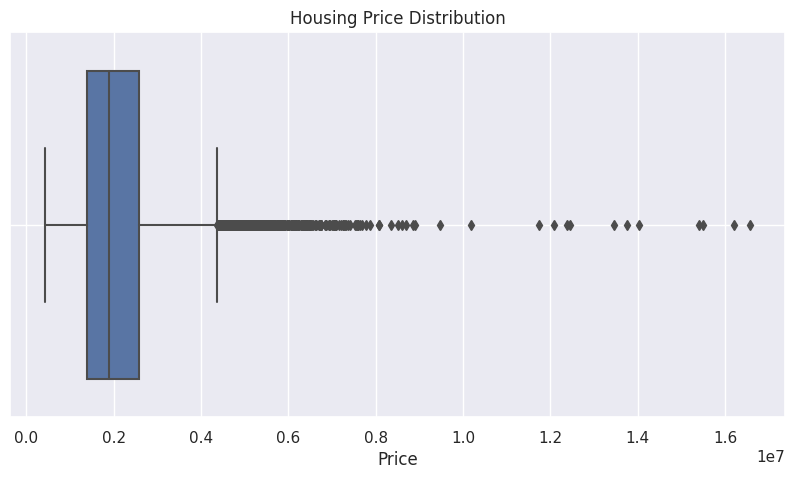

In [ ]:
#using a boxplot to check the distribution of the data
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x='price')
plt.xlabel('Price')
plt.title('Housing Price Distribution')

plt.grid(True)
plt.show()

In [ ]:
#grouping the data by location to check for the average price across the data
train_loc_groupby = train.groupby(train['loc']).mean(numeric_only=True)

In [ ]:
train_loc_groupby.head()

,ID,bedroom,bathroom,parking_space,price
loc,,,,,
Abia,5055.266026,4.131387,3.137931,3.373134,1.717083e+06
Adamawa,4405.217009,4.269625,3.020408,3.087108,1.905287e+06
Akwa Ibom,4781.866261,4.275261,3.090592,3.142349,2.725454e+06
Anambra,4951.118457,4.078689,3.058065,3.279365,2.337230e+06
Bauchi,4831.602339,4.435714,3.359060,3.130872,1.772961e+06


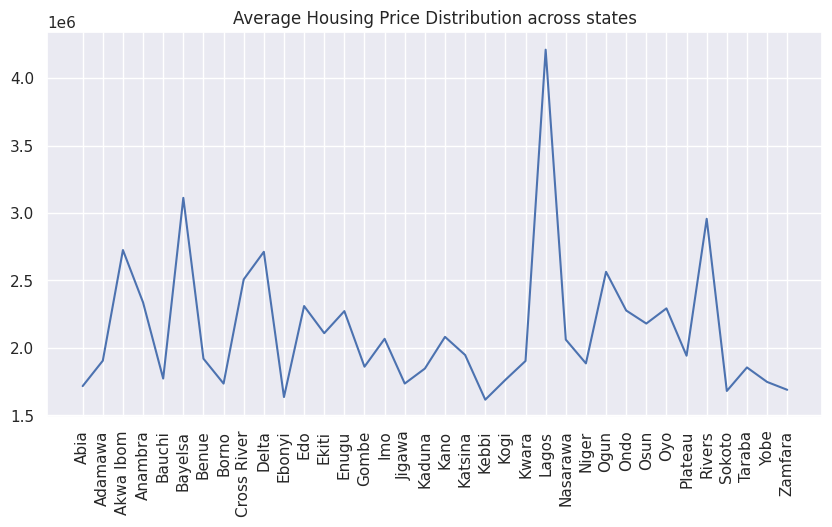

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train_loc_groupby['price'], label='loc')
# plt.xlabel('Location')
plt.title('Average Housing Price Distribution across states')
plt.xticks(rotation=90)

plt.show()

In [ ]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

<Figure size 1000x500 with 0 Axes>

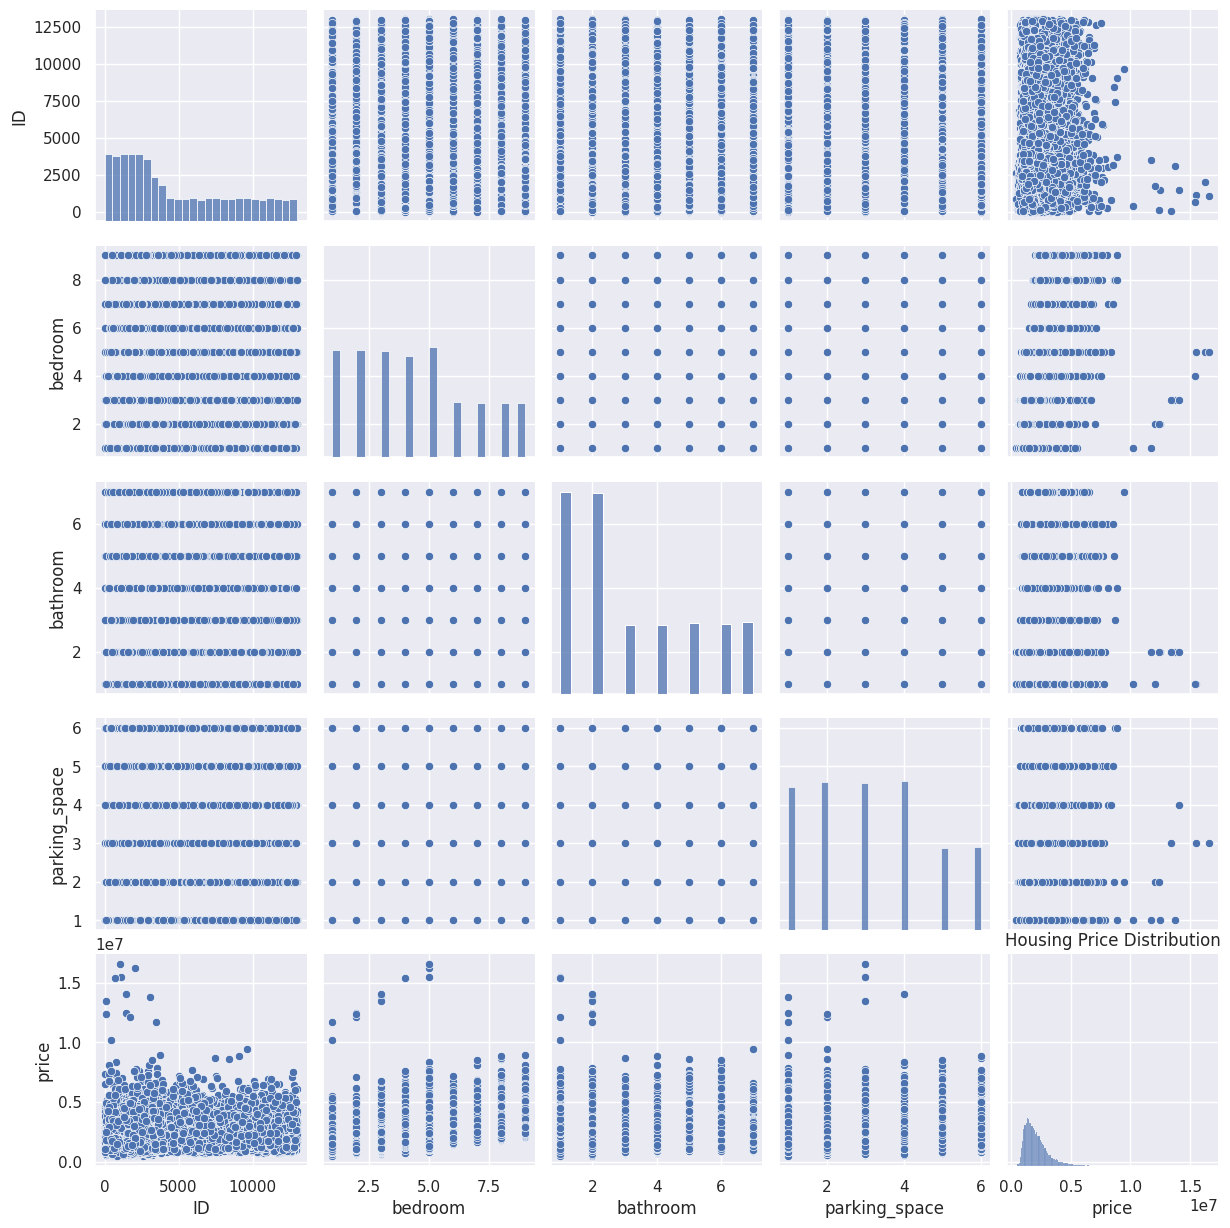

In [ ]:
#a pairplot of the data
plt.figure(figsize=(10,5))
sns.pairplot(data=train)
plt.xlabel('Price')
plt.title('Housing Price Distribution')

plt.grid(True)
plt.show()

/tmp/ipykernel_9986/2388822178.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = train.corr()


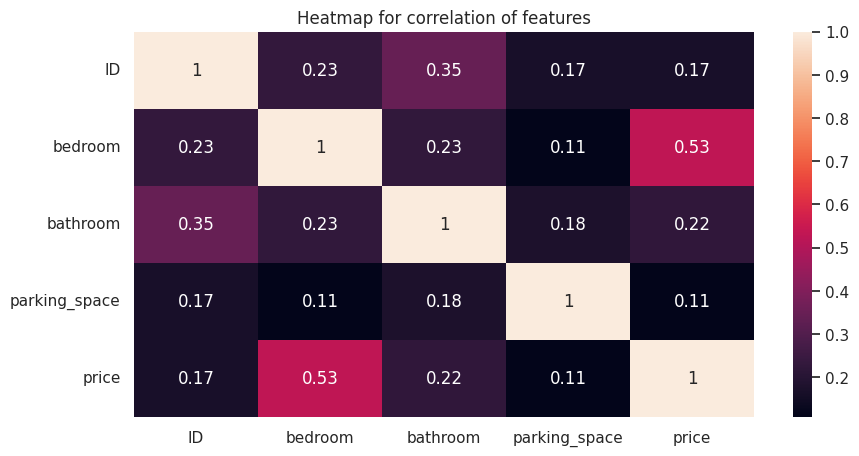

In [ ]:
#correlation of the data columns against each column
corr_ = train.corr()

plt.figure(figsize=(10,5))
sns.heatmap(data=corr_, annot=True)
plt.title('Heatmap for correlation of features')

plt.grid(True)
plt.show()

## Modelling

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [ ]:
#checking for nan values in the test set
test.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [ ]:
#creating a new price column for the test data before merging it with the train data for easy transforation
test['price'] = 0

In [ ]:
#appending the test data to the train data
data = train.append(test)

/tmp/ipykernel_9986/3862322379.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test)


In [ ]:
data.shape

(20000, 7)

In [ ]:
# Dictionary to map states to geopolitical zones
state_to_zone = {
    "Abia": "South-East",
    "Adamawa": "North-East",
    "Akwa Ibom": "South-South",
    "Anambra": "South-East",
    "Bauchi": "North-East",
    "Bayelsa": "South-South",
    "Benue": "North-Central",
    "Borno": "North-East",
    "Cross River": "South-South",
    "Delta": "South-South",
    "Ebonyi": "South-East",
    "Edo": "South-South",
    "Ekiti": "South-West",
    "Enugu": "South-East",
    "Gombe": "North-East",
    "Imo": "South-East",
    "Jigawa": "North-West",
    "Kaduna": "North-West",
    "Kano": "North-West",
    "Katsina": "North-West",
    "Kebbi": "North-West",
    "Kogi": "North-Central",
    "Kwara": "North-Central",
    "Lagos": "South-West",
    "Nasarawa": "North-Central",
    "Niger": "North-Central",
    "Ogun": "South-West",
    "Ondo": "South-West",
    "Osun": "South-West",
    "Oyo": "South-West",
    "Plateau": "North-Central",
    "Rivers": "South-South",
    "Sokoto": "North-West",
    "Taraba": "North-East",
    "Yobe": "North-East",
    "Zamfara": "North-West",
}

In [ ]:
#mapping the loc data to geo political zones
data['zone'] = data['loc'].map(state_to_zone)

In [ ]:
#creating a rank for the housing type using a dictionary
house_type_ranks = {
    'Cottage': 1,
    'Bungalow': 2,
    'Townhouse': 3,
    'Terrace duplex': 4,
    'Detached duplex': 5,
    'Semi-detached duplex': 6,
    'Flat': 7,
    'Penthouse': 8,
    'Apartment': 9,
    'Mansion': 10
}

In [ ]:
#mapping the created dictionary to the title column
data['title'] = data['title'].map(house_type_ranks)

In [ ]:
# Calculate the frequency of each category in the 'loc' column
category_frequencies = data['loc'].value_counts(normalize=True)

# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping = category_frequencies.to_dict()

# Map the 'loc' column to its corresponding frequency values
data['loc'] = data['loc'].map(loc_frequency_mapping)

# Print the updated dataframe
data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,zone
0,3583,0.028592,6.0,2.0,2.0,1.0,1149999.565,North-West
1,2748,0.028097,9.0,NaN,2.0,4.0,1672416.689,South-West
2,9261,0.027822,NaN,7.0,5.0,NaN,3364799.814,South-West
3,2224,0.029856,5.0,5.0,2.0,4.0,2410306.756,South-East
4,10300,0.027382,4.0,NaN,5.0,6.0,2600700.898,North-Central


In [ ]:
#creating a new feature ROOMS from the bathroom, bedroom and parking space
data['rooms'] = data['bathroom'] + data['bedroom'] + data['parking_space']

In [ ]:
# creating a new feature with the bathroom ratio the bathroom data
data['bathroom_ratio'] = data['bathroom']/(data['bathroom'] + data['bedroom'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              20000 non-null  int64  
 1   loc             18187 non-null  float64
 2   title           18278 non-null  float64
 3   bedroom         18201 non-null  float64
 4   bathroom        18195 non-null  float64
 5   parking_space   18189 non-null  float64
 6   price           20000 non-null  float64
 7   zone            18187 non-null  object 
 8   rooms           14799 non-null  float64
 9   bathroom_ratio  16469 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
#storing the columns into categorical and numerical variables for easy handling
cat_cols = data.select_dtypes(include='object').columns.tolist()
num_cols = data.select_dtypes(exclude='object').columns.tolist()

In [ ]:
cat_cols, num_cols

(['zone'],
 ['ID',
  'loc',
  'title',
  'bedroom',
  'bathroom',
  'parking_space',
  'price',
  'rooms',
  'bathroom_ratio'])

In [ ]:
# converting the zone column into numerical data
data['zone'] = data['zone'].astype('category').cat.codes

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              20000 non-null  int64  
 1   loc             18187 non-null  float64
 2   title           18278 non-null  float64
 3   bedroom         18201 non-null  float64
 4   bathroom        18195 non-null  float64
 5   parking_space   18189 non-null  float64
 6   price           20000 non-null  float64
 7   zone            20000 non-null  int8   
 8   rooms           14799 non-null  float64
 9   bathroom_ratio  16469 non-null  float64
dtypes: float64(8), int64(1), int8(1)
memory usage: 1.5 MB


In [ ]:
# !pip install catboost -q

In [ ]:
from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X = data[:-test.shape[0]].drop(columns=['price'], axis=0)
y = data[:-test.shape[0]].price
test_data = data[filled_train_encoded['price'] == 0].drop(['price'], axis=1)

RANDOM_STATE = 42

In [ ]:
X.shape, y.shape, test_data[X.columns].shape

((14000, 9), (14000,), (6000, 9))

In [ ]:
# sns.set()
# y_transformed = pd.Series(np.square(np.sqrt(y)))

# fig, ax = plt.subplots(1, 2)
# sns.distplot(y, ax=ax[0])
# plt.title("Target after Log transformation")
# # ax[0].axvline(y_transformed)
# sns.distplot(y_transformed, ax=ax[1])
# plt.show()

In [ ]:
oof_pred_2 = []
fold_pred_2 = []

params = {
     'max_depth': 26,
     'n_estimators': 3679,
     'learning_rate': 0.002712819361612371,
     'colsample_bytree': 0.9484547548287134,
     'subsample': 0.8490126211976283}

fold = KFold(n_splits=7)

for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]

  model = LGBMRegressor(**params, objective='rmse')
  model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False, early_stopping_rounds=100)
  model_preds = model.predict(X_test)

  rmse = mean_squared_error(y_test, np.square(model_preds), squared=False)
  print(f'err: {rmse}')
  fold_pred_2.append(rmse)
  oof = model.predict(test_data[X.columns])
  oof_pred_2.append(np.square(oof))


np.mean(fold_pred_2)

/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


err: 491761.4985212819


/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


err: 612127.9623033772


/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


err: 473664.36096137203


/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


err: 520062.3687361451


/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


err: 539175.2574155735


/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


err: 518015.427595605


/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/gbotemi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


err: 584612.6199789522


534202.7850731867

Text(0.5, 1.0, 'LGB features importance (top 50):')

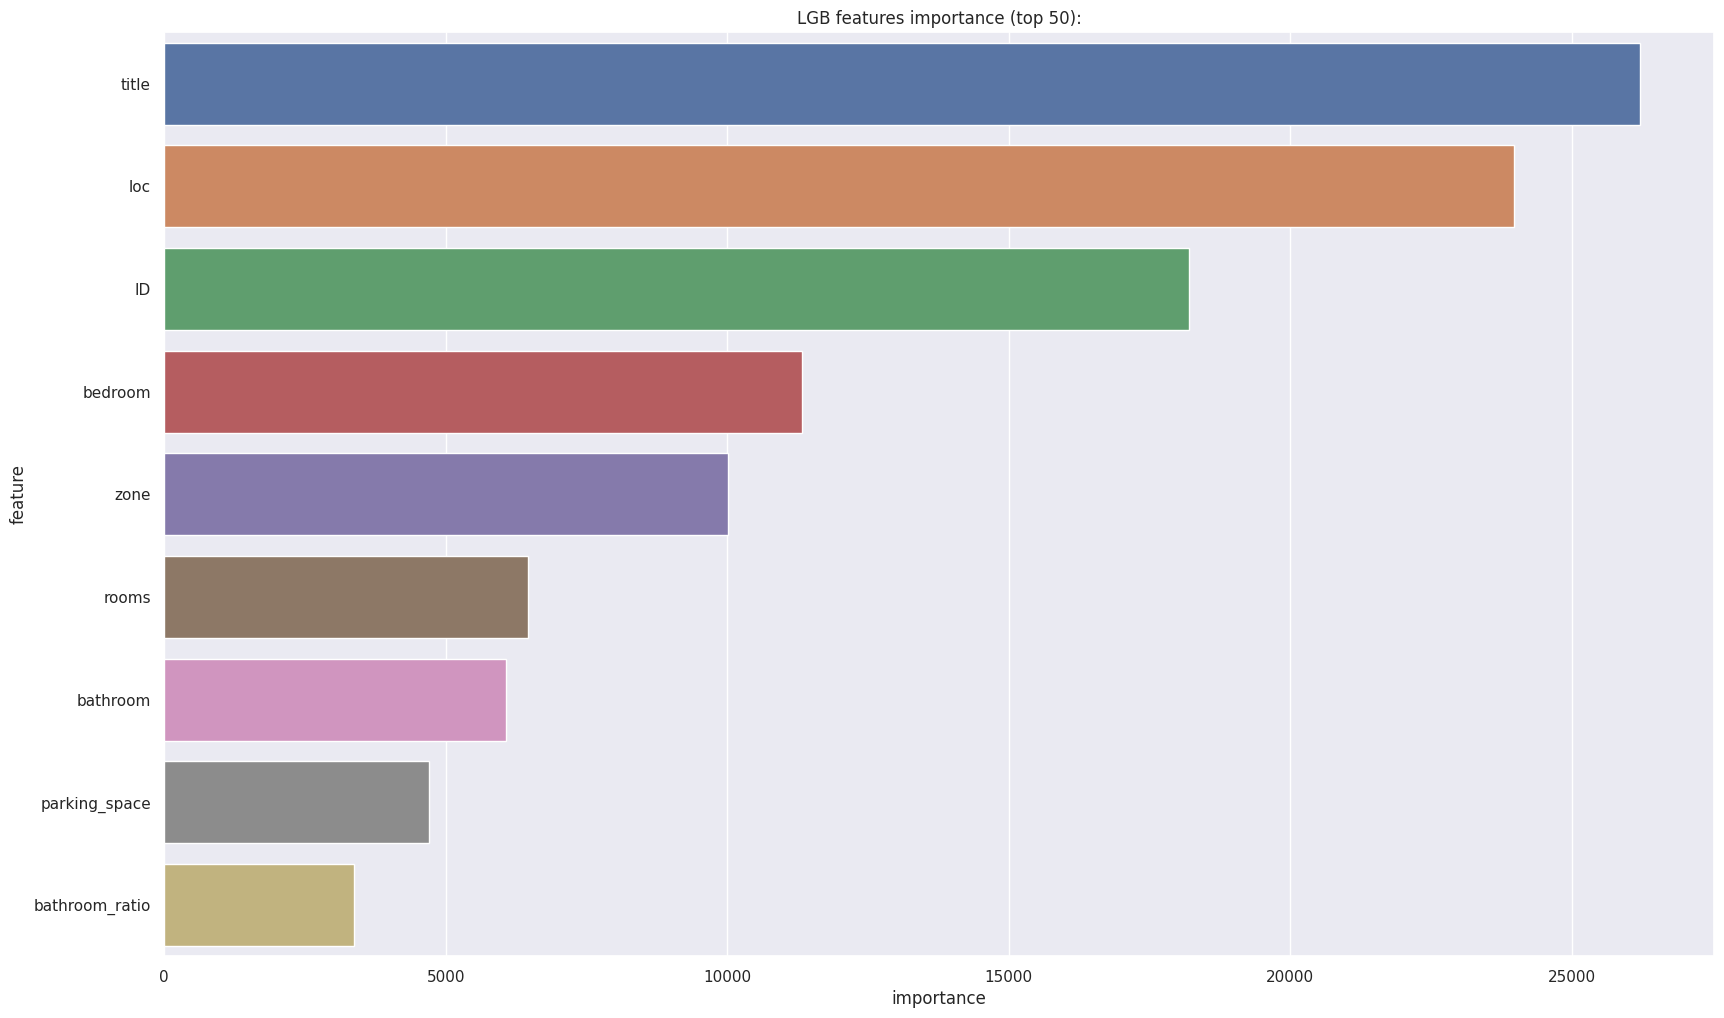

In [ ]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12))
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('LGB features importance (top 50):')

In [ ]:
np.mean(oof_pred_2, axis=0)

array([2157595.45515333,  989140.03240059, 1208519.41535525, ...,
       2075127.36016944, 1438683.90119046, 3470089.770216  ])

In [ ]:
submission_sample['price'] = np.mean(oof_pred_2, axis=0)
submission_sample.to_csv('Lgb_7 submission.csv', index=False)
submission_sample.head()

,ID,price
0,845,2.157595e+06
1,1924,9.891400e+05
2,10718,1.208519e+06
3,12076,7.424327e+06
4,12254,1.935446e+06


In [ ]:
oof_pred_3 = []
fold_pred_3 = []

fold = KFold(n_splits=7)

for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]

  model = CatBoostRegressor(learning_rate=0.01, n_estimators=2000)
  model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)
  model_preds = model.predict(X_test)

  rmse = mean_squared_error(y_test, np.square(model_preds), squared=False)
  print(f'err: {rmse}')
  fold_pred_3.append(rmse)
  oof = model.predict(test_data[X.columns])
  oof_pred_3.append(np.square(oof))


np.mean(fold_pred_3)

/home/gbotemi/.local/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


err: 499018.5217518552


/home/gbotemi/.local/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


err: 607394.2529461588


/home/gbotemi/.local/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


err: 465435.90354910714


/home/gbotemi/.local/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


err: 523527.7661486238


/home/gbotemi/.local/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


err: 538701.5908670508


/home/gbotemi/.local/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


err: 500964.329324295


/home/gbotemi/.local/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


err: 586566.4669859451


/home/gbotemi/.local/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


531658.4045104337

In [ ]:
submission_sample['price'] = np.mean(oof_pred_3, axis=0)
submission_sample.to_csv('Cat_7 submission.csv', index=False)
submission_sample.head()

,ID,price
0,845,2.206550e+06
1,1924,9.187362e+05
2,10718,1.163022e+06
3,12076,8.025462e+06
4,12254,1.843114e+06


In [ ]:
oof_pred_4 = []
fold_pred_4 = []

fold = KFold(n_splits=7)

for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]

  model = XGBRegressor(learning_rate=0.01, n_estimators=2000)
  model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)
  model_preds = model.predict(X_test)

  rmse = mean_squared_error(y_test, np.square(model_preds), squared=False)
  print(f'err: {rmse}')
  fold_pred_4.append(rmse)
  oof = model.predict(test_data[X.columns])
  oof_pred_4.append(np.square(oof))


np.mean(fold_pred_4)

In [ ]:
submission_sample['price'] = np.mean(oof_pred_4, axis=0)
submission_sample.to_csv('Xgb_5 submission.csv', index=False)
submission_sample.head()

# Hyperparameter Tuning

In [ ]:
import optuna

In [ ]:
# def objective(trial):

#     max_depth = trial.suggest_int('rf_max_depth', 2, 32)
#     n_estimators = trial.suggest_int('n_estimators', 100, 4000)
#     learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0, 1)
#     subsample = trial.suggest_float('subsample', 0, 1)

#     params = {
#         'max_depth':max_depth,
#         'colsample_bytree': colsample_bytree,
#         'learning_rate': learning_rate,
#         'n_estimators': n_estimators,
#         'subsample': subsample,
#     }

#     X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=RANDOM_STATE)

#     LGB = CatBoostRegressor(**params)
#     LGB.fit(X_train, y_train)
#     y_pred = LGB.predict(X_val)

#     error = mean_squared_error(y_val, y_pred, squared=False)

#     return error  # An objective value linked with the Trial object.

#  # Invoke optimization of the objective function.

In [ ]:
def objective(trial):

    max_depth = trial.suggest_int('rf_max_depth', 2, 16)
    n_estimators = trial.suggest_int('n_estimators', 100, 4000)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0, 1)
    subsample = trial.suggest_float('subsample', 0, 1)

    params = {
        'max_depth':max_depth,
#         'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'n_estimators': n_estimators,
        'subsample': subsample,
    }

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=RANDOM_STATE)

    CAT = CatBoostRegressor(**params)
    CAT.fit(X_train, y_train, verbose=0)
    y_pred = CAT.predict(X_val)

    error = mean_squared_error(y_val, y_pred, squared=False)

    return error  # An objective value linked with the Trial object.

In [ ]:
study = optuna.create_study(direction='minimize')  # Create a new study.
study.optimize(objective, n_trials=100)

[I 2023-08-06 14:25:46,580] A new study created in memory with name: no-name-15fb2ab2-531f-4dff-b48b-b1376f15677d
[I 2023-08-06 14:25:53,716] Trial 0 finished with value: 576129.2543902358 and parameters: {'rf_max_depth': 11, 'n_estimators': 529, 'learning_rate': 0.06455367174443834, 'subsample': 0.43625841484720584}. Best is trial 0 with value: 576129.2543902358.
/home/gbotemi/.local/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
[I 2023-08-06 14:26:03,780] Trial 1 finished with value: 671184.3102130804 and parameters: {'rf_max_depth': 7, 'n_estimators': 3050, 'learning_rate': 0.000635824373713653, 'subsample': 0.5551330404486285}. Best is trial 0 with value: 576129.2543902358.
/home/gbotemi/.local/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

In [ ]:
study.best_trial

FrozenTrial(number=95, state=TrialState.COMPLETE, values=[551678.5994224877], datetime_start=datetime.datetime(2023, 8, 6, 14, 17, 1, 888573), datetime_complete=datetime.datetime(2023, 8, 6, 14, 17, 7, 916277), params={'rf_max_depth': 26, 'n_estimators': 3679, 'learning_rate': 0.002712819361612371, 'colsample_bytree': 0.9484547548287134, 'subsample': 0.8490126211976283}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'n_estimators': IntDistribution(high=4000, log=False, low=100, step=1), 'learning_rate': FloatDistribution(high=0.1, log=True, low=1e-05, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.0, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.0, step=None)}, trial_id=95, value=None)

In [ ]:
trial = study.best_trial

In [ ]:
trial.value

551678.5994224877

In [ ]:
trial.params

{'rf_max_depth': 26,
 'n_estimators': 3679,
 'learning_rate': 0.002712819361612371,
 'colsample_bytree': 0.9484547548287134,
 'subsample': 0.8490126211976283}